In [ ]:
import kagglehub
import tensorflow as tf
import numpy as np
import os
import shutil
import random
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# glowny zbior
path = kagglehub.dataset_download("mengcius/cinic10")
train_dir = path + "/train"
valid_dir = path + "/valid"
test_dir = path + "/test"

# tworzenie zbioru maly_zbior
shutil.rmtree(os.path.join(os.path.dirname(path), "maly_zbior"), ignore_errors=True)
maly_zbior = os.path.join(os.path.dirname(path), "maly_zbior")
os.makedirs(maly_zbior, exist_ok=True)
shutil.rmtree(os.path.join(os.path.dirname(path), "maly_zbior_test"), ignore_errors=True)
maly_zbior_test = os.path.join(os.path.dirname(path), "maly_zbior_test")
os.makedirs(maly_zbior_test, exist_ok=True)
print("Path to source dataset files:", path)
print("Path to maly_zbior files:", maly_zbior)
print("Path to maly_zbior_test files:", maly_zbior_test)

Path to source dataset files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/1
Path to maly_zbior files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior
Path to maly_zbior_test files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test


# 1. Wypisanie podfolderów w CINIC10 i ilość obrazów (klasy: test, train, valid)

In [ ]:
def print_folder_structure_and_image_count(path, indent_level=0):
    indent = " " * 2 * indent_level
    folder_name = os.path.basename(path) or os.path.basename(os.path.dirname(path))
    files = os.listdir(path)
    image_count = sum(
        1 for f in files
        if os.path.isfile(os.path.join(path, f))
        and f.lower().endswith(('.png', '.jpg', '.jpeg'))
    )
    print(f"{indent}{folder_name}/ - {image_count} images")

    # Przechodzimy rekurencyjnie przez podfoldery
    for item in sorted(files):
        item_path = os.path.join(path, item)
        if os.path.isdir(item_path):
            print_folder_structure_and_image_count(item_path, indent_level + 1)

print("___________________________ Duży zbiór jak wygląda:")
print_folder_structure_and_image_count(path)


___________________________ Duży zbiór jak wygląda:
1/ - 0 images
  test/ - 0 images
    airplane/ - 9000 images
    automobile/ - 9000 images
    bird/ - 9000 images
    cat/ - 9000 images
    deer/ - 9000 images
    dog/ - 9000 images
    frog/ - 9000 images
    horse/ - 9000 images
    ship/ - 9000 images
    truck/ - 9000 images
  train/ - 0 images
    airplane/ - 9000 images
    automobile/ - 9000 images
    bird/ - 9000 images
    cat/ - 9000 images
    deer/ - 9000 images
    dog/ - 9000 images
    frog/ - 9000 images
    horse/ - 9000 images
    ship/ - 9000 images
    truck/ - 9000 images
  valid/ - 0 images
    airplane/ - 9000 images
    automobile/ - 9000 images
    bird/ - 9000 images
    cat/ - 9000 images
    deer/ - 9000 images
    dog/ - 9000 images
    frog/ - 9000 images
    horse/ - 9000 images
    ship/ - 9000 images
    truck/ - 9000 images


# 2. Stworzenie małego zbioru (2000 obrazów po 200 z każdej klasy)

In [ ]:
# Iterujemy po każdej "klasie" w katalogu 'train'
for class_name in os.listdir(train_dir):
    class_source = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_source): continue

    class_target = os.path.join(maly_zbior, class_name)
    os.makedirs(class_target, exist_ok=True)

    # Pobieramy tylko pliki obrazów
    images = sorted([f for f in os.listdir(class_source)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    selected = images[::45] # tylko co 45 - bedzie 2000 obrazow
    # Kopiujemy wybrane obrazki do nowego folderu
    for file in selected:
        shutil.copy(os.path.join(class_source, file), os.path.join(class_target, file))

    print(f"{len(selected)} obrazów skopiowanych do {class_target}")

print("\n___________________________ Mały zbiór jak wygląda:")
print("\nNowe podzbiory i ilość obrazów:")
print_folder_structure_and_image_count(maly_zbior)

200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/dog
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/horse
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/cat
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/bird
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/airplane
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/deer
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/truck
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/automobile
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior/frog
200 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cin

# Tak samo test (po 20 obrazów):

In [ ]:
# Iterujemy po każdej "klasie" w katalogu 'test'
for class_name in os.listdir(test_dir):
    class_source = os.path.join(test_dir, class_name)

    if not os.path.isdir(class_source): continue

    class_target = os.path.join(maly_zbior_test, class_name)
    os.makedirs(class_target, exist_ok=True)

    # Pobieramy tylko pliki obrazów
    images = sorted([f for f in os.listdir(class_source)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    selected = images[::450] # tylko co 450 - bedzie 200 obrazow
    # Kopiujemy wybrane obrazki do nowego folderu
    for file in selected:
        shutil.copy(os.path.join(class_source, file), os.path.join(class_target, file))

    print(f"{len(selected)} obrazów skopiowanych do {class_target}")

print("\n___________________________ Mały zbiór jak wygląda:")
print("\nNowe podzbiory i ilość obrazów:")
print_folder_structure_and_image_count(maly_zbior_test)

20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/dog
20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/horse
20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/cat
20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/bird
20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/airplane
20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/deer
20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/truck
20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/automobile
20 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/maly_zbior_test/frog
20 obrazów skopiowanych do /root/.ca

In [ ]:
class_mapping = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 3. Preprocessing obrazka
Robimy mniejszy obrazek, żeby było szybciej?

In [ ]:
# rozmiar obrazka
IMG_SIZE = (32, 32)

datagen = ImageDataGenerator(rescale=1.0/255,
    validation_split=0.2  # 80% na trening, 20% na walidację
)
# Więcej parametrów na później (tylko do train):
# horizontal_flip=True, # przydaje sie w treningu bo losowo odbija obrazy w poziomie. Pomaga w zwiększeniu różnorodności danych, np. w przypadku obrazów samochodów, które mogą jechać w różnych kierunkach.
# rotation_range=10 # tak samo z obrotem

# 4. Podział zbioru na trening i valid

In [ ]:
train_generator = datagen.flow_from_directory(
    maly_zbior,
    target_size=IMG_SIZE,
    batch_size=10, # reminder przy wiekszym zbiorze dac pewnie 32
    class_mode="sparse",
    subset="training",
    shuffle=True
)

# Validation generator - wybiera 200 obrazów
valid_generator = datagen.flow_from_directory(
    maly_zbior,
    target_size=IMG_SIZE,
    batch_size=10,
    class_mode="sparse",
    subset="validation",
    shuffle=True
)

print(f"Train set: {train_generator.samples} images")
print(f"Validation set: {valid_generator.samples} images")

Found 1600 images belonging to 10 classes.
Found 400 images belonging to 10 classes.
Train set: 1600 images
Validation set: 400 images


# 5. Część wizualna do wyswietlenia obrazów

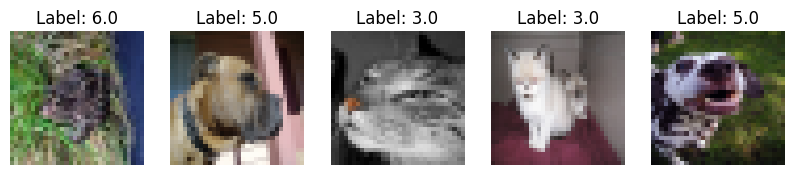

Wektor - pierwsze piksele od lewej w pionie 
 [[0.3372549  0.4666667  0.28627452]
 [0.5411765  0.454902   0.36862746]
 [0.40000004 0.47058827 0.33333334]
 [0.48627454 0.4666667  0.3372549 ]
 [0.29803923 0.41176474 0.21176472]
 [0.4039216  0.48627454 0.27058825]
 [0.4431373  0.40000004 0.33333334]
 [0.43921572 0.427451   0.37647063]
 [0.3254902  0.2901961  0.27058825]
 [0.3372549  0.35686275 0.32156864]
 [0.45882356 0.4901961  0.4431373 ]
 [0.3019608  0.30588236 0.27058825]
 [0.18823531 0.16862746 0.12156864]
 [0.27058825 0.2392157  0.18039216]
 [0.19607845 0.17254902 0.12941177]
 [0.30588236 0.30980393 0.2627451 ]
 [0.36862746 0.38431376 0.24705884]
 [0.42352945 0.4156863  0.2901961 ]
 [0.43921572 0.3921569  0.34117648]
 [0.5254902  0.46274513 0.37254903]
 [0.5176471  0.45882356 0.36078432]
 [0.26666668 0.27058825 0.16862746]
 [0.37254903 0.38823533 0.30588236]
 [0.19215688 0.18823531 0.16470589]
 [0.29411766 0.3019608  0.36078432]
 [0.13333334 0.15294118 0.27450982]
 [0.11764707 0.152

In [ ]:
import matplotlib.pyplot as plt

images, labels = next(train_generator)  # zwraca zbiór obrazków i odpowiadające im labels.

# Wyświetlenie 5 pierwszych obrazów:
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])  # Obrazki są w formacie RGB
    plt.axis("off")
    plt.title(f"Label: {labels[i]}")

plt.show()
print("Wektor - pierwsze piksele od lewej w pionie \n", images[0,0])
print("\nRozmiar obrazu:", images[0].shape)
print("\nRozmiar tablicy wektora:", len(images[0])) # sam nie wiem czym jest 1. obrazek xd

# Unikalne klasy

Found 2000 images belonging to 10 classes.


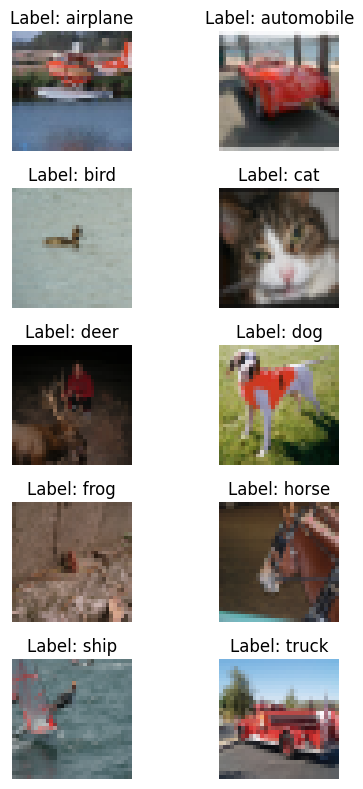

In [ ]:
visual = datagen.flow_from_directory(
    maly_zbior,
    target_size=IMG_SIZE,
    batch_size=64,
    class_mode="sparse",
    shuffle=True
)
images, labels = next(visual)
unique_classes = np.unique(labels)

plt.figure(figsize=(5, 8))
for i, class_label in enumerate(unique_classes[:10]):
    # Znalezienie indeksów obrazów dla danej klasy
    class_indices = np.where(labels == class_label)[0]
    image_idx = class_indices[0]  # Bierzemy pierwszy obrazek z danej klasy

    plt.subplot(5, 2, i + 1)
    plt.imshow(images[image_idx])
    plt.axis("off")
    plt.title(f"Label: {class_mapping[int(class_label)]}")

plt.tight_layout()
plt.show()


# 6. Architektura prostego CNN

opis:

1) Input shape: Obrazy mają rozmiar 32×32 piksele i 3 kanały kolorów (RGB).

2) Pierwsza warstwa konwolucyjna:
- Używamy 32 filtrów, co oznacza, że model uczy się 32 różnych zestawów wag do ekstrakcji cech z obrazu by wychwycić podstawowe wzorce (krawędzie, tekstury) w początkowych warstwach.
- Kernel o rozmiarze (3,3)
Macierz o wymiarach 3×3 jest standardem w CNN, ponieważ jest wystarczająco mały, aby uchwycić lokalne cechy (konkretne krawędzie), a jednocześnie efektywny obliczeniowo.
- Ustawienie „same” sprawia, że rozmiar wyjścia pozostaje taki sam jak wejścia (32×32)

3) Pierwsza warstwa pooling - zmiejszenie wymiaru
- Max pooling o rozmiarze (2,2)
redukuje rozmiary map cech o połowę w każdej osi (spatial dimensions). Zmniejsza to liczbę parametrów, poprawia odporność na niewielkie przesunięcia obrazu i zmniejsza obciążenie obliczeniowe.
Po tej operacji rozmiar mapy cech zmienia się z 32×32 na 16×16 (przy 32 filtrach).

4) Druga warstwa konwolucyjna:
- Teraz używamy już zwiększonej liczby filtrów do 64 co pozwala modelowi uchwycić bardziej złożone cechy. Zwiększamy głębokość reprezentacji, dzięki czemu kolejne warstwy mogą wykrywać bardziej abstrakcyjne wzorce.
Kernel (jądro) (3,3) i padding="same"
Te same parametry co w pierwszej warstwie: niewielkie okno konwolucyjne, które ułatwia wychwycenie lokalnych struktur, przy jednoczesnym zachowaniu rozmiaru mapy cech.

5) Druga warstwa pooling:
 - Po drugiej warstwie konwolucyjnej kolejny max pooling zmniejsza rozmiar map cech o połowę. Jeśli przed poolingiem był rozmiar 16×16 przy 64 filtrach, to po poolingu zmienia się on na 8×8.

6) Warstwa flatten (spłaszczająca)
- Przekształca wyjście z ostatniej warstwy pooling (o wymiarach 8×8×64) na jednowymiarowy wektor.
W naszym przypadku wektor będzie miał 8×8×64 = 4096 elementów.
Dzięki temu dane mogą zostać podane do warstwy w pełni Dense.

7) Warstwa Dense - zwyczajne neurony
Warstwa zawiera 128 neuronów, które uczą się kombinacji cech wyekstrahowanych przez warstwy konwolucyjne. A więc na zebranych informacjach o wzorach z warstw konwolucyjnych przewidują jaką klasę ma input.

8) Ostatnia warstwa wyjściowa
- Ostatnia warstwa z 10 neuronami (dla 10 klas) i funkcją aktywacji softmax, która przekształca wyjścia w prawdopodobieństwa, sumujące się do 1. Dzięki temu model wyznacza, do której klasy należy obraz.


Użycie funkcji aktywacji ReLU pozwala na wprowadzanie nieliniowości.

In [ ]:
def create_basic_cnn(input_shape=(32, 32, 3), num_classes=10):

    najprostszy_cnn = keras.Sequential([ # jedna konwolucja

        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

          layers.Flatten(),
          layers.Dense(128, activation="relu"),
          layers.Dense(num_classes, activation="softmax")
    ])

    troche_lepszy_cnn = keras.Sequential([ # dwie konwolucje

        layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

          layers.Flatten(),
          layers.Dense(128, activation="relu"),
          layers.Dense(num_classes, activation="softmax")
    ])

    return najprostszy_cnn, troche_lepszy_cnn

model, troche_lepszy_cnn  = create_basic_cnn()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) # najlepszy optymizator
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # krosentropia jako funkcja kosztu
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,050,890 (4.01 MB)

 Trainable params: 1,050,890 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Trening

In [ ]:
EPOCHS = 15

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS
)

Epoch 1/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.1348 - loss: 2.3211 - val_accuracy: 0.2500 - val_loss: 2.0573
Epoch 2/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3291 - loss: 1.9094 - val_accuracy: 0.2650 - val_loss: 1.9396
Epoch 3/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3973 - loss: 1.6800 - val_accuracy: 0.3375 - val_loss: 1.8123
Epoch 4/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4923 - loss: 1.4297 - val_accuracy: 0.3200 - val_loss: 1.8215
Epoch 5/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.6214 - loss: 1.1783 - val_accuracy: 0.3850 - val_loss: 1.7176
Epoch 6/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6983 - loss: 0.9410 - val_accuracy: 0.3550 - val_loss: 1.8308
Epoch 7/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7689 - loss: 0.7571 - val_accuracy: 0.3850 - val_loss: 1.8630
Epoch 8/15
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8075 - loss: 0.6115 - val_accu

# 8. Historia treningu:

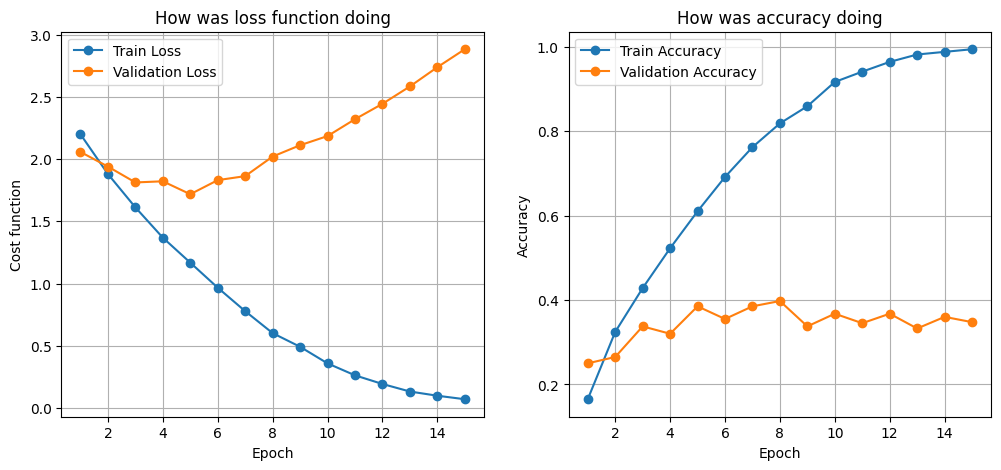

In [ ]:
# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

## Interpretacja chata:

1) Funkcja kosztu:
- Krzywa treningowa (niebieska) maleje stale - to oznacza, że model dobrze dopasowuje się do danych treningowych.
- Krzywa walidacyjna (pomarańczowa) najpierw spada, ale potem zaczyna rosnąć – to sygnał przeuczenia (overfitting).

 Model uczy się dobrze na zbiorze treningowym, ale jego wydajność na zbiorze walidacyjnym przestaje się poprawiać, a nawet pogarsza.

2) Accuracy
- Dokładność na zbiorze treningowym gwałtownie rośnie i osiąga prawie 100%.
- Dokładność walidacyjna jest niska i nie rośnie znacząco – wskazuje, że model nie generalizuje dobrze na nowych danych.

## Co to oznacza:

- Przeuczenie (Overfitting) – Model zapamiętał dane treningowe zamiast nauczyć się ogólnych wzorców.
- Zbyt mały zbiór danych – Być może zbiór treningowy jest zbyt mały (np. 1000 obrazów to mało dla CNN).
- Zbyt skomplikowany model – Jeśli model ma za dużo parametrów, może łatwo przeuczyć się na małym zbiorze.
- Potrzeba regularyzacji – Można dodać techniki regularyzacyjne, np. Dropout lub L2 Regularization.

## Tipy na później:
- ✅ Większy zbiór danych – Więcej obrazów pomoże poprawić generalizację.
- ✅ Data Augmentation – Sztuczne zwiększenie danych przez obracanie, przybliżanie, zmiany kolorów itd.
- ✅ Dodanie Dropoutu – Regularizacja Dropout pomoże uniknąć przeuczenia.
- ✅ Wczesne zatrzymanie (Early Stopping) – Przerwanie uczenia, gdy walidacyjna funkcja kosztu przestaje maleć.
- ✅ Zmniejszenie liczby neuronów – Jeśli model jest za duży, można go uprościć.

# 9. Test

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    maly_zbior_test,
    target_size=IMG_SIZE,
    batch_size=10,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Found 200 images belonging to 10 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4029 - loss: 2.8678
Test Loss: 2.8780
Test Accuracy: 0.3700


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


# 10. Obrazki jak wyszło

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


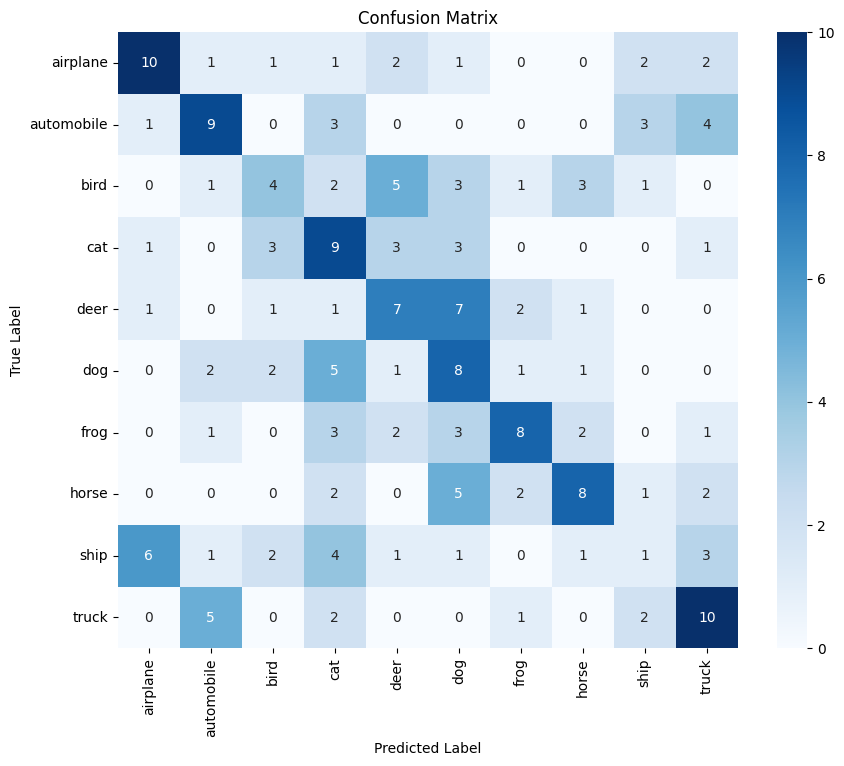

Classification Report:
              precision    recall  f1-score   support

    airplane       0.53      0.50      0.51        20
  automobile       0.45      0.45      0.45        20
        bird       0.31      0.20      0.24        20
         cat       0.28      0.45      0.35        20
        deer       0.33      0.35      0.34        20
         dog       0.26      0.40      0.31        20
        frog       0.53      0.40      0.46        20
       horse       0.50      0.40      0.44        20
        ship       0.10      0.05      0.07        20
       truck       0.43      0.50      0.47        20

    accuracy                           0.37       200
   macro avg       0.37      0.37      0.36       200
weighted avg       0.37      0.37      0.36       200



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generowanie predykcji
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

- Najlepiej rozpoznał samolot, kota i ciężarówkę
- Wyniki są do dupy

Próba z trochę większym zbiorem:

# 11. Trochę większy zbiór

In [ ]:
shutil.rmtree(os.path.join(os.path.dirname(path), "troche_wiekszy_zbior"), ignore_errors=True)
troche_wiekszy_zbior = os.path.join(os.path.dirname(path), "troche_wiekszy_zbior")
os.makedirs(troche_wiekszy_zbior, exist_ok=True)
shutil.rmtree(os.path.join(os.path.dirname(path), "troche_wiekszy_zbior_test"), ignore_errors=True)
troche_wiekszy_zbior_test = os.path.join(os.path.dirname(path), "troche_wiekszy_zbior_test")
os.makedirs(troche_wiekszy_zbior_test, exist_ok=True)
print("Path to troche_wiekszy_zbior files:", troche_wiekszy_zbior)
print("Path to troche_wiekszy_zbior_test files:", troche_wiekszy_zbior_test)

Path to troche_wiekszy_zbior files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior
Path to troche_wiekszy_zbior_test files: /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior_test


In [ ]:
# Iterujemy po każdej "klasie" w katalogu 'train'
for class_name in os.listdir(train_dir):
    class_source = os.path.join(train_dir, class_name)

    if not os.path.isdir(class_source): continue

    class_target = os.path.join(troche_wiekszy_zbior, class_name)
    os.makedirs(class_target, exist_ok=True)
    images = sorted([f for f in os.listdir(class_source)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    selected = images[::10] # tylko co 10 - bedzie 9000 obrazow
    # Kopiujemy wybrane obrazki do nowego folderu
    for file in selected:
        shutil.copy(os.path.join(class_source, file), os.path.join(class_target, file))

    print(f"{len(selected)} obrazów skopiowanych do {class_target}")

print("\n___________________________ Mały zbiór jak wygląda train:")
print("\nNowe podzbiory i ilość obrazów:")
print_folder_structure_and_image_count(troche_wiekszy_zbior)

for class_name in os.listdir(test_dir):
    class_source = os.path.join(test_dir, class_name)

    if not os.path.isdir(class_source): continue

    class_target = os.path.join(troche_wiekszy_zbior_test, class_name)
    os.makedirs(class_target, exist_ok=True)
    images = sorted([f for f in os.listdir(class_source)
                     if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    selected = images[::100] # tylko co 100 - bedzie 900 obrazow
    # Kopiujemy wybrane obrazki do nowego folderu
    for file in selected:
        shutil.copy(os.path.join(class_source, file), os.path.join(class_target, file))

    print(f"{len(selected)} obrazów skopiowanych do {class_target}")

print("\n___________________________ Mały zbiór jak wygląda test:")
print("\nNowe podzbiory i ilość obrazów:")
print_folder_structure_and_image_count(troche_wiekszy_zbior_test)

900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/dog
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/horse
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/cat
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/bird
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/airplane
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/deer
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/truck
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_wiekszy_zbior/automobile
900 obrazów skopiowanych do /root/.cache/kagglehub/datasets/mengcius/cinic10/versions/troche_w

In [ ]:
train_generator2 = datagen.flow_from_directory( # wybiera 7200 obrazów
    troche_wiekszy_zbior,
    target_size=IMG_SIZE,
    batch_size=32, # wieksze batche
    class_mode="sparse",
    subset="training",
    shuffle=True
)

# Validation generator - wybiera 1800 obrazów
valid_generator2 = datagen.flow_from_directory(
    troche_wiekszy_zbior,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="sparse",
    subset="validation",
    shuffle=True
)

print(f"Train set: {train_generator2.samples} images")
print(f"Validation set: {valid_generator2.samples} images")

Found 7200 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.
Train set: 7200 images
Validation set: 1800 images


In [ ]:
EPOCHS = 20

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.001, decay_steps=10000, decay_rate=0.9) # troche opoznienia w uczeniu
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
troche_lepszy_cnn.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

history = troche_lepszy_cnn.fit(
    train_generator2,
    validation_data=valid_generator2,
    epochs=EPOCHS
)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.2118 - loss: 2.1192 - val_accuracy: 0.3261 - val_loss: 1.7990
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.3674 - loss: 1.7057 - val_accuracy: 0.4183 - val_loss: 1.6102
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.4181 - loss: 1.6093 - val_accuracy: 0.4361 - val_loss: 1.5141
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.4834 - loss: 1.4517 - val_accuracy: 0.4567 - val_loss: 1.5067
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5124 - loss: 1.3565 - val_accuracy: 0.4611 - val_loss: 1.4957
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.5559 - loss: 1.2349 - val_accuracy: 0.4706 - val_loss: 1.4769
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6010 - loss: 1.1290 - val_accuracy: 0.5028 - val_loss: 1.3841
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6494 - loss: 1.0135 - 

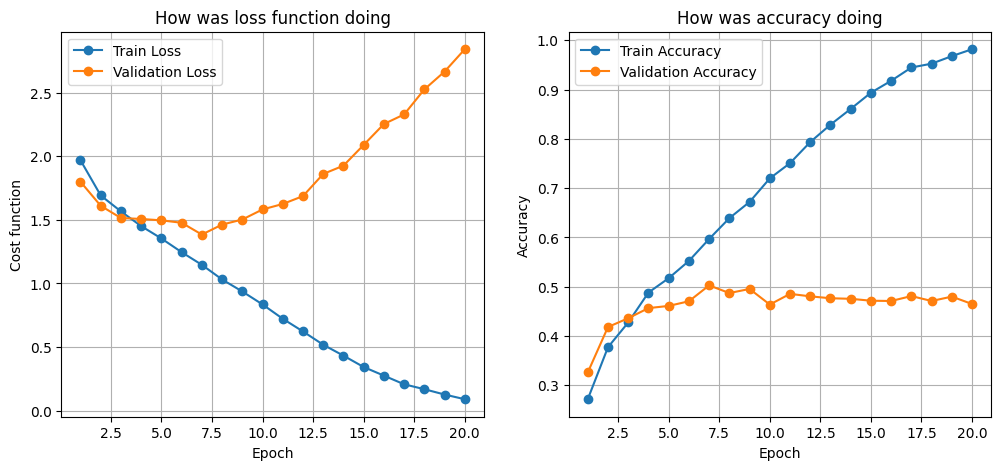

In [ ]:
# Pobranie historii uczenia
loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
epochs_range = range(1, len(loss) + 1)

# Wykres funkcji kosztu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label="Train Loss", marker="o")
plt.plot(epochs_range, val_loss, label="Validation Loss", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cost function")
plt.title("How was loss function doing")
plt.legend()
plt.grid(True)

# Wykres dokładności
plt.subplot(1, 2, 2)
plt.plot(epochs_range, accuracy, label="Train Accuracy", marker="o")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy", marker="o")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("How was accuracy doing")
plt.legend()
plt.grid(True)
plt.show()

wciąż po lewo wygląda do kitu - pomaranczowa linia odbija w górę a dalej spróbujemy zrobić zeby umiarkowanie podążała ze wzorem niebieskiej linii i spadała

Po prawo pomaranczowa accuracy zatrzymuje sie. Overfitting następuje bardzo wcześnie ( już na 5 epoce )

In [ ]:
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator2 = test_datagen.flow_from_directory(
    troche_wiekszy_zbior_test,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode="sparse",
    shuffle=False  # Ustawiamy shuffle=False, aby kolejność etykiet była poprawna
)
test_loss, test_accuracy = troche_lepszy_cnn.evaluate(test_generator2)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Found 900 images belonging to 10 classes.
 4/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4993 - loss: 2.3726

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4585 - loss: 3.0856
Test Loss: 3.2328
Test Accuracy: 0.4344


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


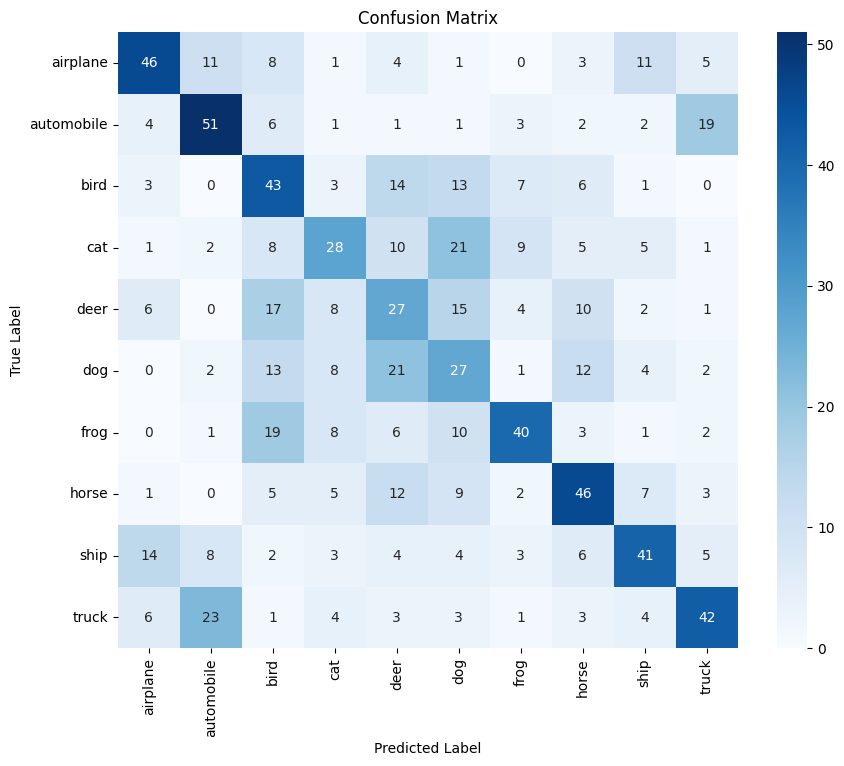

Classification Report:
              precision    recall  f1-score   support

    airplane       0.57      0.51      0.54        90
  automobile       0.52      0.57      0.54        90
        bird       0.35      0.48      0.41        90
         cat       0.41      0.31      0.35        90
        deer       0.26      0.30      0.28        90
         dog       0.26      0.30      0.28        90
        frog       0.57      0.44      0.50        90
       horse       0.48      0.51      0.49        90
        ship       0.53      0.46      0.49        90
       truck       0.53      0.47      0.49        90

    accuracy                           0.43       900
   macro avg       0.45      0.43      0.44       900
weighted avg       0.45      0.43      0.44       900



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generowanie predykcji
predictions = troche_lepszy_cnn.predict(test_generator2)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator2.classes
class_labels = list(test_generator2.class_indices.keys())

# Macierz pomyłek (Confusion Matrix)
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Klasyfikacyjny raport
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

Wygląda dla mnie sporo lepiej

Stan na 9000 zdjęć:
Największy problem ma zeby sklasyfikować:
- kota
- jelenia
- psa

pomysl: usunac klasy kot, jelen, pies i zobaczyć różnice